## Analisis exploratorio de datos sobre riesgo cardiaco

#### Materia de análisis exploratorio de datos I de la maestria en ciencia de datos

Autor correspondiente: Alejandro Cordoba Erazo | alejitocordoba@hotmail.es

> **Abstract:**
>
> Las enfermedades cardiovasculares representan la principal causa de mortalidad global y requieren estrategias de prevención basadas en la identificación temprana de factores de riesgo. Este estudio tiene como objetivo explorar la relación entre variables clínicas (índice de masa corporal, peso, talla y presión arterial) y demográficas (edad, sexo y etnia) con la clasificación de riesgo cardiovascular (alto, moderado, bajo y muy alto) en pacientes de las comunas 13, 14, 15 y 21 de Cali atendidos en la Empresa Social del Estado (ESE) Oriente entre agosto de 2019 y marzo de 2023. Para ello, se realizará un análisis exploratorio de datos que incluye aproximaciones univariadas y bivariadas, seguido de la preparación de datos para un análisis inferencial. La pregunta central es determinar si, en los próximos 10 días, es posible establecer con al menos un 80% de certeza estadística la existencia de asociaciones significativas entre estas variables y el riesgo cardiovascular. Con este análisis se espera aportar evidencia epidemiológica relevante para orientar estrategias de prevención y control adaptadas al contexto local.

### Introducción

La visualización de datos es la representación de información a través de imágenes o gráficos que facilitan a los responsables la comprensión visual y el descubrimiento de patrones ocultos. La interpretación de datos complejos y de gran volumen es más accesible para el ser humano mediante gráficos en comparación con formatos tabulares o textuales. En la era digital, las conclusiones clave para la toma de decisiones en organizaciones a menudo se derivan del Análisis Exploratorio de Datos (EDA). El EDA es una técnica para estudiar conjuntos de datos con el fin de reconocer su estructura subyacente, identificar patrones y correlaciones entre variables, y ayudar a confirmar hipótesis.
Las enfermedades cardiovasculares representan la principal causa de mortalidad a nivel mundial, lo que exige la implementación de estrategias de prevención fundamentadas en la identificación temprana de factores de riesgo. Este estudio se enfoca en la población de las comunas 13, 14, 15 y 21 de Cali, atendida por la ESE Oriente entre 2019 y 2023, con el objetivo de comprender los factores que inciden en su salud cardiovascular.
En esta investigación, se procesarán y visualizarán los datos clínicos y demográficos de los pacientes para explorar la relación entre variables como el índice de masa corporal, la presión arterial, la edad y el sexo con la clasificación de riesgo cardiovascular (bajo, moderado, alto y muy alto). Mediante un análisis univariado y bivariado, se examinarán las características de las variables y las relaciones entre ellas. Los resultados de este EDA servirán como base para una posterior preparación de datos y análisis inferencial, buscando aportar evidencia epidemiológica que permita orientar estrategias de prevención y control adaptadas al contexto local.

### Metodologia

La metodología de la investigación sigue cuatro pasos, a saber: identificación de variables, análisis de datos univariado, análisis de datos bivariado y preparación de los datos.

![Ilustración de la metodologia](https://github.com/elkofix/cardiac-risk-db/blob/master/images/metodology.png?raw=1)

**Identificación de variables:** este es un paso esencial para distinguir y comprender claramente el significado de cada variable en un conjunto de datos antes de analizar los datos. Los conjuntos de datos comúnmente tienen variables numéricas o nominales. Una característica esencial de los datos numéricos es que podemos aplicarles muchas operaciones matemáticas. A una variable nominal, categórica o de factor no se le pueden aplicar operaciones matemáticas.
Análisis de datos univariado: el objetivo del análisis univariado es obtener una mejor comprensión de cada atributo. En este paso, analizamos cada atributo para entender cómo se ve cada uno. Se utilizan paquetes de visualización para graficar los datos.

**Análisis de datos bivariado:** el objetivo del análisis bivariado es analizar las relaciones entre dos atributos. En este paso, comparamos dos atributos para analizar la correlación entre ellos. Se utilizan paquetes de visualización para graficar los datos.

**Preparación de los datos:** este es el paso final del proceso de EDA. Este proceso realiza la limpieza de datos, la imputación de valores faltantes, el manejo de datos atípicos y la reducción de datos. El objetivo es preparar un conjunto de datos consolidado para el análisis inferencial posterior.

### Identificación de las variables

In [205]:
def obtener_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    atipicos = columna[(columna < Q1 - 1.5*IQR) | (columna > Q3 + 1.5*IQR)]
    return atipicos.index  # Retorna índices

In [206]:
import pandas as pd

df = pd.read_csv("https://media.githubusercontent.com/media/elkofix/cardiac-risk-db/refs/heads/master/completa.csv", sep=',')

In [207]:
df.shape

(2782908, 29)

In [208]:
df.head()

,11_CodEtnia_Indigena,11_CodEtnia_Negro,11_CodEtnia_Otro,11_CodEtnia_Palenquero de San Basilio,11_CodEtnia_ROM (Gitano),11_CodEtnia_Raizal,ENDOSALUD_SI,Indice Masa Corporal = Peso/talla Al Cuadrado,24_Talla,23_Peso,...,9_Regimen_SUBSIDIADO,18_DxHTA_SI,18_DxHTA_NO,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,CLASIFICACION FINAL DEL RIESGO_ALTO,CLASIFICACION FINAL DEL RIESGO_BAJO,CLASIFICACION FINAL DEL RIESGO_MODERADO,20_DxDM_SI,CLASIFICACION FINAL DEL RIESGO_MUY ALTO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.892323,167.0,75.0,...,1,1,0,1,0,0,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31.250000,160.0,80.0,...,1,1,0,1,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.690405,161.0,64.0,...,1,1,0,1,0,0,0,1,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.000000,160.0,64.0,...,0,1,0,0,0,1,0,0,1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.437500,160.0,60.0,...,1,0,1,0,1,1,0,0,1,0


In [209]:
df.dtypes

,0
11_CodEtnia_Indigena,float64
11_CodEtnia_Negro,float64
11_CodEtnia_Otro,float64
11_CodEtnia_Palenquero de San Basilio,float64
11_CodEtnia_ROM (Gitano),float64
11_CodEtnia_Raizal,float64
ENDOSALUD_SI,float64
Indice Masa Corporal = Peso/talla Al Cuadrado,float64
24_Talla,float64
23_Peso,float64


In [210]:
df.describe()

,11_CodEtnia_Indigena,11_CodEtnia_Negro,11_CodEtnia_Otro,11_CodEtnia_Palenquero de San Basilio,11_CodEtnia_ROM (Gitano),11_CodEtnia_Raizal,ENDOSALUD_SI,Indice Masa Corporal = Peso/talla Al Cuadrado,24_Talla,23_Peso,...,9_Regimen_SUBSIDIADO,18_DxHTA_SI,18_DxHTA_NO,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,CLASIFICACION FINAL DEL RIESGO_ALTO,CLASIFICACION FINAL DEL RIESGO_BAJO,CLASIFICACION FINAL DEL RIESGO_MODERADO,20_DxDM_SI,CLASIFICACION FINAL DEL RIESGO_MUY ALTO
count,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,...,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06
mean,1.730097e-02,2.830780e-01,6.978434e-01,4.312036e-06,6.514768e-04,1.121848e-03,6.843561e-03,2.849729e+01,1.619945e+02,7.441758e+01,...,9.792544e-01,8.950109e-01,1.049880e-01,7.099376e-01,1.049880e-01,3.806547e-01,3.308985e-01,2.545585e-01,2.900603e-01,3.388829e-02
std,1.303904e-01,4.504941e-01,4.591928e-01,2.076540e-03,2.551573e-02,3.347521e-02,8.244228e-02,2.113921e+01,8.483833e+00,1.546337e+01,...,1.425314e-01,3.065394e-01,3.065380e-01,4.537910e-01,3.065380e-01,4.855479e-01,4.705367e-01,4.356129e-01,4.537900e-01,1.809417e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.460973e+01,1.570000e+02,6.400000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.768878e+01,1.620000e+02,7.300000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e+01,1.680000e+02,8.300000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+03,2.600000e+02,2.580000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Limpieza

#### Continuas

##### Presión arterial sistólica

La presión arterial sistólica refleja la fuerza con la que el corazón bombea sangre hacia las arterias y, por tanto, el grado de tensión que soporta el sistema vascular en cada latido. Su elevación sostenida se asocia directamente con daño en las paredes arteriales, rigidez vascular y desarrollo de aterosclerosis, lo que incrementa la probabilidad de infarto, accidente cerebrovascular y otras complicaciones cardiovasculares. Además, numerosos estudios epidemiológicos han demostrado que la presión sistólica, especialmente en adultos mayores, discrimina mejor el riesgo que la diastólica, por lo que se considera un indicador clínico prioritario en la evaluación y predicción de enfermedades del corazón y los vasos sanguíneos.

In [211]:
errores_sis_dia = df[df['25_TenArtSis'] <= df['26_TenArtDitlica']]
print(errores_sis_dia[['25_TenArtSis', '26_TenArtDitlica']])

         25_TenArtSis  26_TenArtDitlica
50465           111.0             111.0
51796           111.0             111.0
52304           111.0             111.0
63386           107.0             111.0
65030           111.0             111.0
...               ...               ...
2778726         110.0             110.0
2779947          90.0              90.0
2780077          80.0              80.0
2780554           0.0              90.0
2781920           0.0              60.0

[321 rows x 2 columns]


In [212]:
df = df.drop(errores_sis_dia.index)

Se ha identificado un error manifiesto en el dataset: la presencia de observaciones en las que la presión arterial sistólica es inferior a la diastólica. Dado que esto contradice los principios fisiológicos de la medición de la presión arterial, se ha determinado la necesidad de excluir dichos registros para mantener la integridad del conjunto de datos.

In [213]:
df = df[(df['25_TenArtSis'] >= 70) & (df['25_TenArtSis'] <= 250)]

Adicionalmente, he procedido a limpiar el dataset eliminando datos que son incompatibles con la vida. Esto incluye los registros con valor de '0' en la presión arterial y aquellos que se encuentran fuera del rango realista establecido entre 70 y 250 mmHg para excluir errores de medición y valores atípicos.

In [214]:
sis_atipicos = obtener_atipicos(df['25_TenArtSis'])
df.drop(sis_atipicos, inplace=True)

Por último, se ha determinado la necesidad de eliminar los datos atípicos que aún persisten en la variable de presión arterial sistólica. Aunque algunos de estos valores extremos podrían ser mediciones correctas, su presencia puede afectar de manera desproporcionada a estimadores estadísticos como la media y a la robustez de los modelos predictivos. Por ello, y con el fin de garantizar que las conclusiones del estudio reflejen la tendencia central de los datos, se han suprimido estos registros anómalos.

##### Presión arterial diastólica
La presión arterial diastólica mide la presión residual que permanece en las arterias cuando el corazón está en su fase de relajación, entre un latido y otro. Este valor indica la resistencia mínima que el sistema vascular ofrece de forma continua al flujo sanguíneo. Una elevación persistente de la presión diastólica, conocida como hipertensión diastólica, se asocia con un aumento de la resistencia vascular periférica.

In [215]:
df = df[(df['26_TenArtDitlica'] >= 40) & (df['26_TenArtDitlica'] <= 130)]

Tras la exploración inicial, se identificaron valores de presión diastólica fuera del rango fisiológicamente plausible, como mediciones de 0 y valores extremadamente altos hasta 191 mmHg. Para asegurar la calidad y fiabilidad del conjunto de datos, se ha procedido a una primera fase de limpieza. Se aplicó un filtro para conservar únicamente los registros con una presión diastólica entre 40 y 130 mmHg. Este rango se establece para excluir tanto los errores de medición evidentes (valores cercanos a cero) como los valores atípicos extremos que podrían distorsionar los resultados del análisis.

In [216]:
dis_atipicos = obtener_atipicos(df['26_TenArtDitlica'])
df.drop(dis_atipicos, inplace=True)

##### Edad
La edad es una variable demográfica fundamental que cuantifica el tiempo de vida de un individuo, expresado en años cumplidos. En el ámbito de la salud, es considerada el principal factor de riesgo no modificable para la mayoría de las enfermedades crónicas. El envejecimiento es un proceso biológico natural que conlleva cambios fisiológicos progresivos en el organismo, como el aumento de la rigidez arterial, la alteración del metabolismo y cambios en la composición corporal.

In [217]:
df= df[df['EDAD (Años cumplidos)'] >= 18].copy()

Durante el análisis de la variable "edad", se identificó la presencia de registros correspondientes a niños y adolescentes en el conjunto de datos. Dado que la evaluación de indicadores clave como el Índice de Masa Corporal (IMC) y el riesgo cardiovascular se realiza con metodologías y umbrales completamente distintos en la población pediátrica —generalmente basados en percentiles de crecimiento por edad y sexo—, su inclusión en este análisis, enfocado en adultos, introduciría inconsistencias y podría llevar a conclusiones erróneas. Por lo tanto, para garantizar la homogeneidad de la muestra y la validez de los criterios de evaluación, se ha decidido excluir del dataset a todos los individuos menores de 18 años.

In [218]:
edad_atipicos = obtener_atipicos(df['EDAD (Años cumplidos)'])
df.drop(edad_atipicos, inplace=True)

Finalmente, se completó la depuración de la variable "edad" eliminando los valores atípicos superiores. Se excluyeron todos los registros con edades consideradas fisiológicamente inverosímiles o que representaban claros errores de entrada de datos. Este paso finaliza la conformación de una cohorte demográficamente coherente y robusta para el análisis posterior.

##### Altura
La altura, o estatura, es una medida antropométrica fundamental que representa la distancia vertical desde la base de los pies hasta la parte superior de la cabeza de una persona. Generalmente se expresa en centímetros o metros. Es un componente esencial en la evaluación del crecimiento y desarrollo, y además, es crucial para el cálculo de otros indicadores de salud, como el Índice de Masa Corporal (IMC), la superficie corporal y algunas fórmulas para dosificación de medicamentos. Es un indicador relativamente estable en la vida adulta, pero puede verse afectada por factores genéticos, nutricionales y de salud a lo largo de la vida. En el contexto de este estudio, la altura es vital para contextualizar el peso y comprender mejor la composición corporal de los individuos, influyendo indirectamente en la evaluación de riesgos cardiovasculares y metabólicos al ser un factor determinante en el IMC.

In [219]:
def filtrar_alturas_sospechosas(df, columna_talla='24_Talla', columna_peso='23_Peso', min_talla=100, max_talla=220):
    sospechosas = df[(df[columna_talla] < min_talla) | (df[columna_talla] > max_talla)]
    print(sospechosas[[columna_talla, columna_peso]])
    print(sospechosas[[columna_talla, columna_peso]].size)
    return sospechosas, sospechosas[[columna_talla, columna_peso]].size

In [220]:
alturas_sospechosas_df, tamaño = filtrar_alturas_sospechosas(df)
df = df.drop(alturas_sospechosas_df.index)

         24_Talla  23_Peso
117089       10.0     0.26
117092       10.0    25.00
117478       25.0     0.25
117580       25.0     0.25
117582       10.0     0.25
...           ...      ...
2296051      10.0    25.00
2311213      20.0    25.00
2311224      10.0    25.00
2770729     259.0    68.00
2778839      10.0    60.00

[345 rows x 2 columns]
690


In [221]:
altura_atipicos = obtener_atipicos(df['24_Talla'])
df.drop(altura_atipicos, inplace=True)

Como parte del preprocesamiento de los datos, se ha realizado un tratamiento de valores atípicos (outliers) en la variable de altura. Se identificaron registros que exceden los límites fisiológicos conocidos, así como valores en el extremo inferior de la distribución. Con el objetivo de reducir la varianza no representativa y mitigar el posible sesgo en análisis futuros, se ha aplicado un criterio de exclusión basado en un umbral fijo. Se han conservado únicamente las observaciones dentro del intervalo [100 cm, 220 cm], eliminando aquellas que caen fuera de este rango.

##### Peso
El peso corporal es una medida antropométrica que cuantifica la masa total de un individuo y se expresa comúnmente en kilogramos. Es uno de los indicadores de salud más básicos y monitoreados, ya que, junto con la altura, es un componente indispensable para calcular el Índice de Masa Corporal (IMC). Por sí solo, el peso es un pilar en la evaluación del estado nutricional y la clasificación del estado ponderal (bajo peso, peso normal, sobrepeso, obesidad). El exceso de peso, en particular, es un factor de riesgo primario para el desarrollo de una amplia gama de enfermedades crónicas, incluyendo la hipertensión arterial, la diabetes tipo 2 y las enfermedades cardiovasculares.

In [222]:
peso_atipicos = obtener_atipicos(df['23_Peso'])
df.drop(peso_atipicos, inplace=True)

Para la variable de peso, el procedimiento de limpieza fue más sencillo. Al no encontrar errores sistemáticos, la única acción requerida fue la eliminación de sus valores atípicos (outliers) para reducir el ruido en el dataset.

##### Índice de Masa Corporal (IMC)

El Índice de Masa Corporal (IMC) es una medida antropométrica que relaciona el peso de una persona con su estatura, proporcionando una estimación de su grasa corporal. Se calcula dividiendo el peso en kilogramos por el cuadrado de la altura en metros ( kg/m ²). Su simplicidad y bajo costo lo han convertido en la herramienta de cribado más utilizada a nivel mundial para clasificar el estado ponderal de los adultos en categorías como bajo peso, peso normal, sobrepeso y obesidad.

In [223]:
df["Indice Masa Corporal = Peso/talla Al Cuadrado"] = df["23_Peso"] / ((df["24_Talla"] / 100) ** 2)

Dado que la variable de altura fue modificada durante la limpieza de datos, el primer paso lógico fue recalcular el Índice de Masa Corporal (IMC) para todo el dataset. Esto asegura que los valores del IMC sean consistentes con las alturas corregidas

In [224]:
imc_atipicos = obtener_atipicos(df['Indice Masa Corporal = Peso/talla Al Cuadrado'])
df.drop(imc_atipicos, inplace=True)

Por último, se completó la limpieza de datos eliminando los valores atípicos de la variable IMC. Se excluyeron los registros con valores fuera del rango esperado para evitar la influencia desproporcionada de estos puntos en los resultados. Con el dataset ahora depurado de errores y valores extremos en sus variables clave, se puede proceder con el análisis estadístico.

#### Discretas

##### Caracterización Étnica
La pertenencia étnica es una variable demográfica clave que permite contextualizar los resultados de salud al considerar factores socioculturales, genéticos y ambientales. En este dataset, la información sobre la etnia no se presenta en una única columna, sino que ha sido codificada mediante un conjunto de variables binarias (formato one-hot encoding), donde un valor de '1' indica la pertenencia a un grupo específico y '0' la no pertenencia.
Las categorías étnicas registradas son:
- Indígena
- Negro, Mulato, Afrocolombiano o Afrodescendiente
- ROM (Gitano)
- Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina
- Palenquero de San Basilio
- Otro

In [225]:
cols_etnia = [
    "11_CodEtnia_Indigena",
    "11_CodEtnia_Negro",
    "11_CodEtnia_Otro",
    "11_CodEtnia_Palenquero de San Basilio",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Raizal"
]
df["conteo_etnias"] = df[cols_etnia].sum(axis=1)
df["conteo_etnias"].value_counts()
df["conteo_etnias"] = df[cols_etnia].sum(axis=1)
df["conteo_etnias"].value_counts()

,count
conteo_etnias,
1.0,2213023


In [226]:
df = df.drop(columns=["conteo_etnias"])

Considerando que las variables de etnia ya están presentadas en formato one-hot encoding, el único paso de validación requerido fue confirmar la exclusividad de la categoría para cada individuo. Se verificó que cada registro tuviera asignada una única etnia, asegurando la coherencia y la integridad del conjunto de datos antes de proceder con el análisis.

In [227]:
import pandas as pd

df["Etnia_Minorias"] = df[[
    "11_CodEtnia_Raizal",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Palenquero de San Basilio"
]].max(axis=1)

df["Etnia_Otro"] = df["11_CodEtnia_Otro"]
df["Etnia_Negro"] = df["11_CodEtnia_Negro"]
df["Etnia_Indigena"] = df["11_CodEtnia_Indigena"]

df = df.drop(columns=[
    "11_CodEtnia_Raizal",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Palenquero de San Basilio",
    "11_CodEtnia_Otro",
    "11_CodEtnia_Negro",
    "11_CodEtnia_Indigena"
])


Tras analizar la distribución de frecuencias de las categorías étnicas, se observó que los grupos Raizal, ROM (Gitano) y Palenquero de San Basilio tenían una representación muy baja en el conjunto de datos. Analizar categorías con un número tan reducido de observaciones puede introducir ruido estadístico y limitar la potencia de los modelos. Por lo tanto, con el fin de simplificar la estructura de los datos y crear categorías más robustas, se ha decidido agrupar estas tres etnias en una única variable denominada "Etnia_Minorías". Esta consolidación permite un análisis más estable y significativo, manteniendo de forma independiente las categorías con mayor prevalencia.

#####  Caracterización por Régimen
El régimen de afiliación al Sistema General de Seguridad Social en Salud (SGSSS) en Colombia es un indicador socioeconómico clave que refleja la capacidad de pago y el tipo de vinculación de un individuo al sistema sanitario.

In [228]:
cols_regimen = [
    "9_Regimen_CONTRIBUTIVO",
    "9_Regimen_NO ASEGURADO",
    "9_Regimen_SUBSIDIADO"
]

df = df.drop(columns=cols_regimen)

El análisis de la variable de régimen de afiliación reveló un desequilibrio extremo: el 98% de los individuos pertenece al régimen subsidiado. Debido a esta distribución tan sesgada, la variable carece de valor informativo y no contribuye al análisis. En consecuencia, se ha procedido a su eliminación del conjunto de datos.

##### Prevalencia de Hipertensión Arterial Diagnosticada
Más allá de las cifras de presión arterial obtenidas en una única medición, la existencia de un diagnóstico clínico previo de hipertensión arterial (HTA) es un indicador robusto de la carga de enfermedad crónica en una población. Un diagnóstico formal implica que la condición ha sido identificada y, teóricamente, debería estar siendo gestionada, lo que tiene profundas implicaciones para el pronóstico del paciente.

In [229]:
df = df.drop(columns=['18_DxHTA_NO'])

Se ha eliminado la columna 18_DxHTA_NO por ser redundante. La información sobre la ausencia de diagnóstico de hipertensión se infiere directamente del valor '0' en la columna 18_DxHTA_SI, por lo que no es necesario mantener ambas.

##### Pertenencia a Endosalud
El programa "Endosalud" es una iniciativa de gestión de riesgo en salud, enfocada en el seguimiento y control de pacientes con enfermedades crónicas, principalmente endocrinas y metabólicas como la diabetes y la hipertensión arterial.

In [230]:
df = df.drop(columns=['ENDOSALUD_SI'])

La variable ENDOSALUD_SI ha sido eliminada del conjunto de datos debido a un desequilibrio extremo en su distribución. Dado que el 99% de la población pertenece a esta categoría, la variable carece de valor predictivo y no contribuye al análisis, por lo que su eliminación es un paso necesario en la optimización del dataset.

##### Caracterización por Etiología de enfermedad renal crónica por hipertensión y diabetes

Existe una estrecha y peligrosa interrelación entre la hipertensión, la diabetes y la enfermedad renal crónica, formando un "triángulo" de riesgo que acelera el deterioro de la salud cardiovascular. Comprender cuál de estas condiciones es la causa principal de la ERC en los pacientes es clave para evaluar la severidad de su perfil de riesgo. El conjunto de datos nos permite diseccionar esta relación mediante la clasificación de la etiología de la ERC en tres grupos mutuamente excluyentes: aquellos cuya enfermedad renal es consecuencia de la hipertensión, de la diabetes, o de la sinergia de ambas. El análisis de la distribución de estas tres categorías es fundamental para entender las vías patológicas predominantes en esta población.

In [231]:
cols = [
    "22_EtiologiaERC_HTA-DM",
    "22_EtiologiaERC_HTA",
    "22_EtiologiaERC_DM"
]
suma_filas = df[cols].sum(axis=1)

no_exclusivas = suma_filas[suma_filas > 1]

if len(no_exclusivas) == 0:
    print("Las variables son mutuamente excluyentes.")
else:
    print(f"Hay {len(no_exclusivas)} filas que NO son mutuamente excluyentes.")
    print(no_exclusivas.head())


Las variables son mutuamente excluyentes.


Para este grupo de variables se verifica que son mutuamente excluyentes y que tienen una distribución aceptable

##### Análisis de Variables Adicionales de Riesgo y Comorbilidad
A continuación, se describen un conjunto de variables binarias que representan características demográficas, diagnósticos de comorbilidades clave, uso de tratamientos farmacológicos y la etiología de enfermedades asociadas.

**Variable de Sexo**

Es una variable binaria que toma el valor de 1 si el paciente es de sexo femenino y 0 si es masculino. El sexo es un factor demográfico no modificable fundamental en la evaluación del riesgo cardiovascular, ya que existen diferencias conocidas en la prevalencia, presentación y pronóstico de las enfermedades cardiovasculares entre hombres y mujeres.

**Uso de Medicamentos Antihipertensivos**

Estas variables indican si el paciente está recibiendo tratamiento farmacológico específico para la hipertensión, lo cual es un fuerte indicador de que la HTA es una condición gestionada activamente.
- 36_RcbeIECA_SI: Registra el uso de inhibidores de la enzima convertidora de angiotensina (IECA), una de las familias de medicamentos de primera línea para el tratamiento de la hipertensión y la protección cardiovascular.
- 37_RcbeARA2_SI: Registra el uso de antagonistas de los receptores de angiotensina II (ARA II), otra clase de fármacos esenciales con un propósito similar a los IECA.

**Diagnóstico de Diabetes Mellitus (DM)**

Esta variable binaria indica la presencia de un diagnóstico formal de diabetes mellitus. La diabetes es uno de los factores de riesgo cardiovascular más potentes, ya que acelera el proceso de aterosclerosis y frecuentemente coexiste con la hipertensión y la enfermedad renal.

Dado que tienen un potencial claro como factores de riesgo, presentan un balance de clases aceptable, no tienen valores faltantes y ya se encuentran en un formato binario (0/1) listo para ser utilizado, se decide mantenerlas en el conjunto de datos sin necesidad de realizar limpieza o transformaciones adicionales.

### Análisis univariado

#### Continuas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_variable(df, column, title=None, unit=None):
    """
    Muestra un boxplot y un histograma con mínimos, máximos y moda de la columna indicada.

    Parámetros:
    - df: pandas DataFrame
    - column: str, nombre de la columna
    - title: str, título a mostrar en los gráficos (opcional)
    - unit: str, unidad de medida (opcional), se añade a etiquetas
    """
    data = df[column].dropna()  # Eliminamos nulos para los cálculos

    # Estadísticos
    min_val = data.min()
    max_val = data.max()
    mode_val = stats.mode(data, keepdims=True)[0][0]

    # Sufijo para etiquetas
    suffix = f' ({unit})' if unit else ''

    # Título
    main_title = title if title else column

    # Crear figura con dos subplots
    plt.figure(figsize=(12,5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data, color='lightgreen')
    plt.title(f'{main_title} - Boxplot')
    plt.xlabel(f'{main_title}{suffix}')

    # Histograma con KDE
    plt.subplot(1, 2, 2)
    sns.histplot(data, bins=30, kde=True, color="skyblue")
    plt.axvline(min_val, color='green', linestyle='--', linewidth=2, label=f'Mínimo: {min_val}{suffix}')
    plt.axvline(max_val, color='red', linestyle='--', linewidth=2, label=f'Máximo: {max_val}{suffix}')
    plt.axvline(mode_val, color='orange', linestyle='-', linewidth=2, label=f'Moda: {mode_val}{suffix}')
    plt.title(f'{main_title} - Distribución')
    plt.xlabel(f'{main_title}{suffix}')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()
    plt.show()

##### Presión arterial sistólica

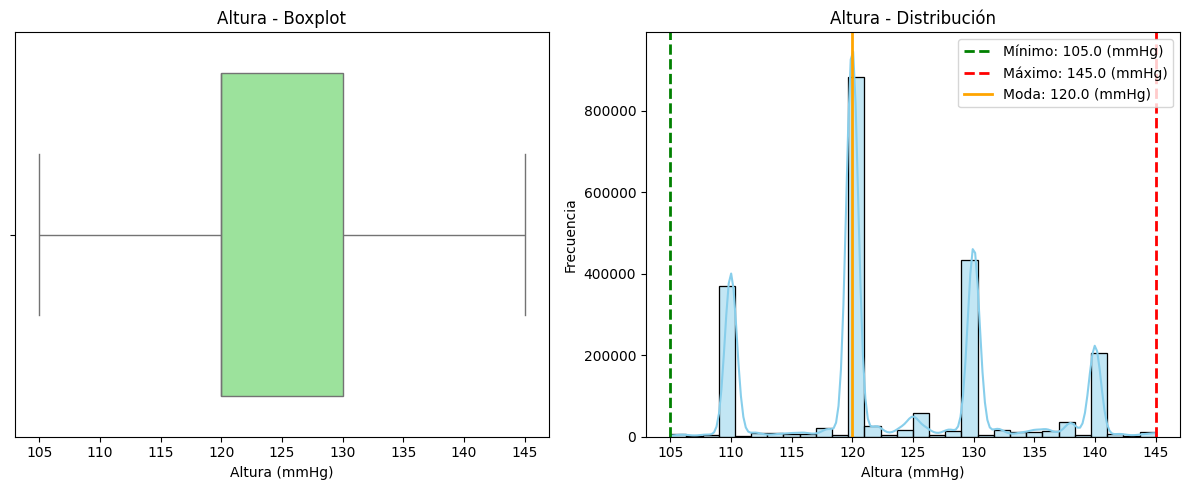

In [ ]:
plot_variable(df, '25_TenArtSis', title='Altura', unit='mmHg')


La distribución de la presión sistólica, con valores mayormente entre 105 y 145 mmHg, revela un sesgo positivo (a la derecha) y una fuerte preferencia por los dígitos terminados en cero, probablemente debido al redondeo en las mediciones. Para corregir estas irregularidades y balancear la influencia de los datos, se propone dividir esta variable continua en un conjunto de categorías definidas.

##### Presión arterial diastólica

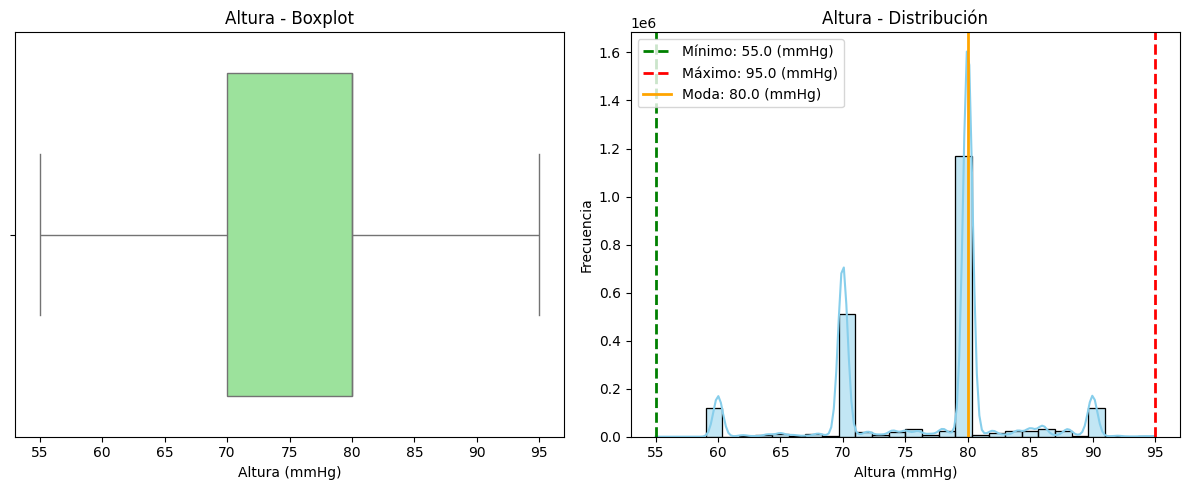

In [ ]:
plot_variable(df, '26_TenArtDitlica', title='Altura', unit='mmHg')

La distribución de la variable de presión diastólica exhibe una fuerte correspondencia con la de la presión sistólica. El rango de datos normal de (55-95 mmHg). La moda de la distribución se encuentra en 80 mmHg, lo cual representa un punto de referencia de normalidad clínica. Un aspecto distintivo de esta distribución es su asimetría, con un sesgo negativo o una inclinación hacia valores más bajos.

##### Índice de Masa Corporal (IMC)

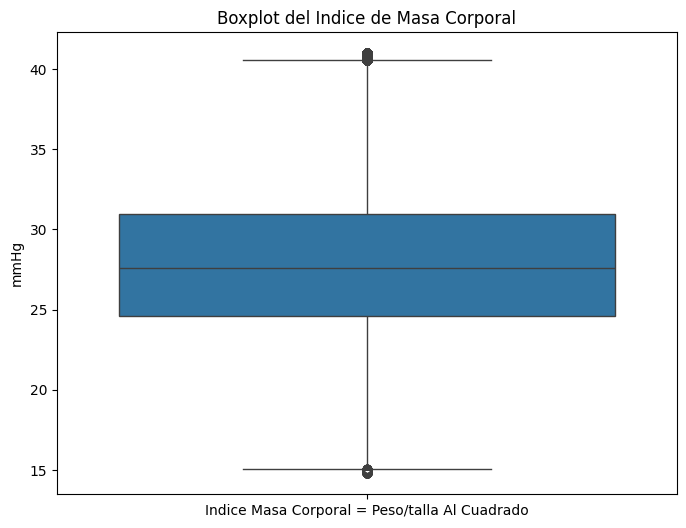

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Indice Masa Corporal = Peso/talla Al Cuadrado']])
plt.title('Boxplot del Indice de Masa Corporal')
plt.ylabel('mmHg')
plt.show()

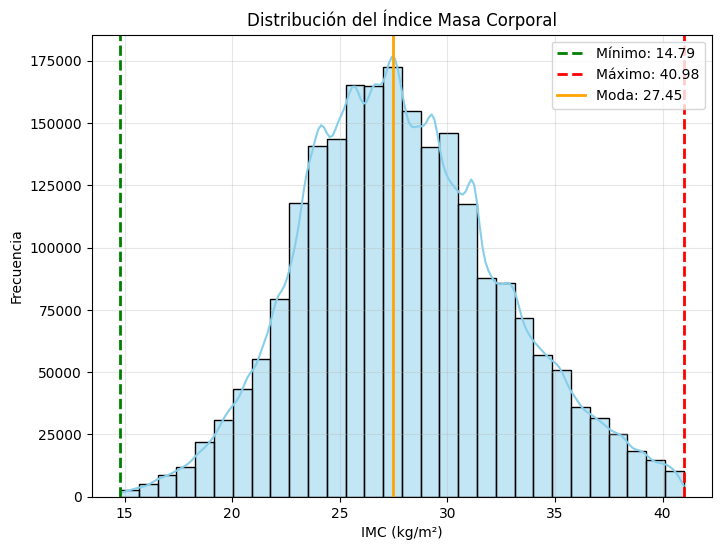

Mínimo: 14.79, Máximo: 40.98, Moda: 27.45, Mediana: 27.59, Media: 27.93


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

imc = df['Indice Masa Corporal = Peso/talla Al Cuadrado']

# Valores clave
min_val, max_val = imc.min(), imc.max()
mode_val = (np.histogram(imc, bins=30)[1][np.argmax(np.histogram(imc, bins=30)[0])] +
            np.histogram(imc, bins=30)[1][np.argmax(np.histogram(imc, bins=30)[0]) + 1]) / 2
median_val, mean_val = imc.median(), imc.mean()

# Gráfico
plt.figure(figsize=(8,6))
sns.histplot(imc, bins=30, kde=True, color="skyblue")
for val, color, label in zip([min_val, max_val, mode_val], ['green', 'red', 'orange'],
                             [f'Mínimo: {min_val:.2f}', f'Máximo: {max_val:.2f}', f'Moda: {mode_val:.2f}']):
    plt.axvline(val, color=color, linestyle='--' if label != f'Moda: {mode_val:.2f}' else '-', linewidth=2, label=label)

plt.title('Distribución del Índice Masa Corporal')
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Impresión rápida
print(f"Mínimo: {min_val:.2f}, Máximo: {max_val:.2f}, Moda: {mode_val:.2f}, Mediana: {median_val:.2f}, Media: {mean_val:.2f}")


La distribución del Índice de Masa Corporal (IMC) es robusta y coherente. Los valores se concentran en un rango realista (15-40 kg/m ²) y la distribución es mayormente simétrica, con sus medidas de tendencia central casi idénticas. Se observa únicamente un leve sesgo hacia la derecha, lo cual es esperable en una población rea

##### Altura

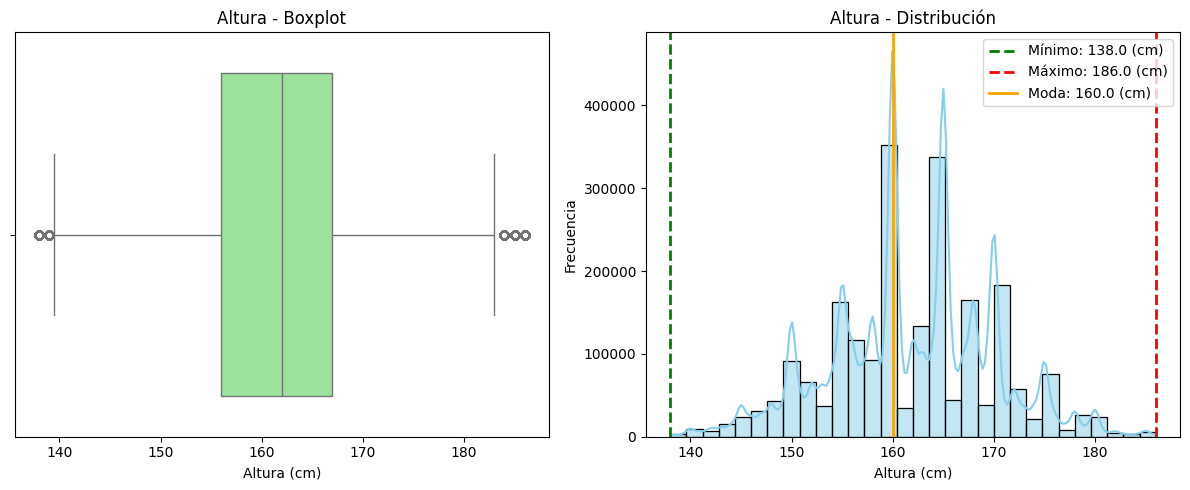

In [ ]:
plot_variable(df, '24_Talla', title='Altura', unit='cm')

La altura de los participantes se encuentra en un rango esperado de 140 a 180 cm, lo cual es consistente con la población de origen. Si bien se observa una preferencia por valores terminados en 0, similar a la presión arterial, en este caso se atribuye más a una práctica común de redondeo en la medición o auto-reporte que a un error de entrada de datos.

##### Peso

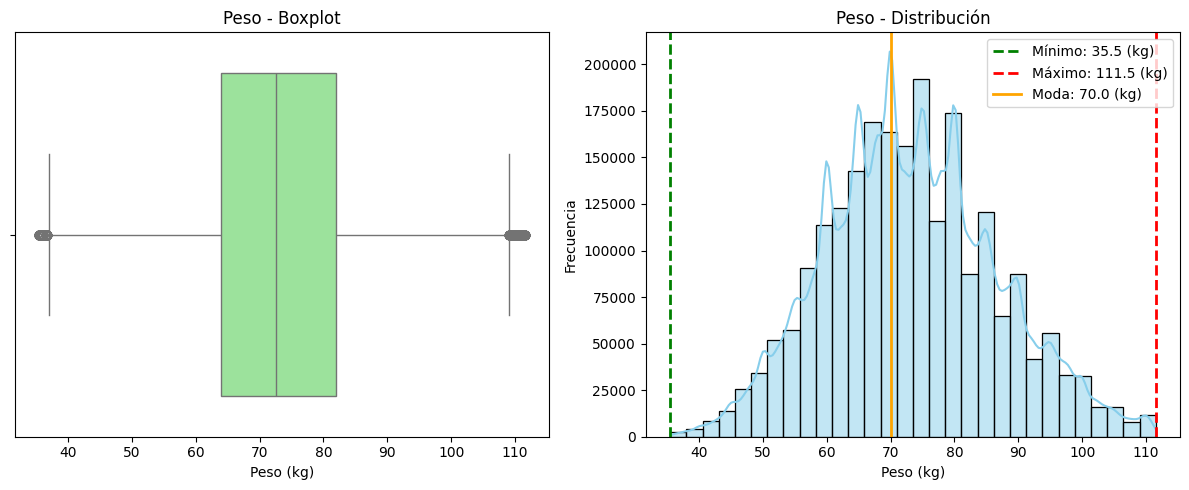

In [ ]:
plot_variable(df, '23_Peso', title='Peso', unit='kg')

La distribución del peso corporal es coherente, con valores que oscilan entre 40 y 110 kg y una moda de 70 kg. La mayoría de los datos se agrupan en la franja de 70-85 kg, y la distribución muestra un claro sesgo a la derecha, indicando una tendencia hacia el sobrepeso en un segmento de la muestra.

##### Edad

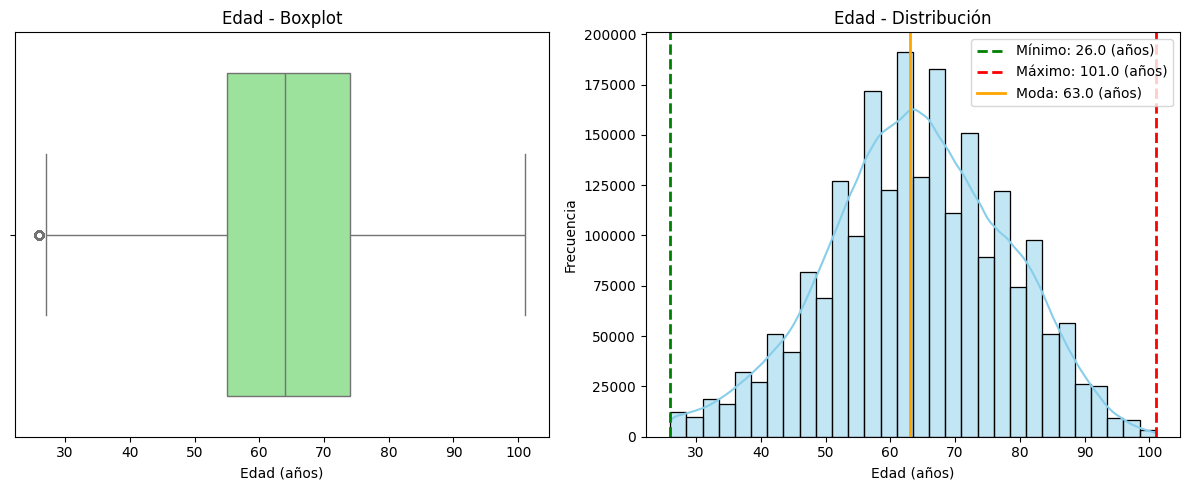

In [ ]:
plot_variable(df, 'EDAD (Años cumplidos)', title='Edad', unit='años')

El rango de edad de la muestra es amplio (26-101 años) y su distribución es notablemente irregular. En lugar de ser unimodal, presenta un patrón de picos de frecuencia recurrentes a lo largo de las distintas edades y estas se concentran entre los 55 y 70 años

#### Discretas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_binary_bar(df, columna, nombre_1='Sí', nombre_0='No', titulo=''):
    """
    Grafica un diagrama de barras para una variable binaria con porcentajes dentro de la barra.

    df: DataFrame
    columna: str, nombre de la columna
    nombre_1: str, etiqueta para valor 1
    nombre_0: str, etiqueta para valor 0
    titulo: str, título personalizado del gráfico
    """
    # Mapear valores a etiquetas
    etiquetas = df[columna].map({1: nombre_1, 0: nombre_0})

    # Contar valores y calcular porcentaje
    conteo = etiquetas.value_counts()
    total = conteo.sum()
    porcentajes = (conteo / total * 100).round(1)

    # Graficar
    plt.figure(figsize=(6,4))
    sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')

    # Título y etiquetas
    plt.title(titulo if titulo else f'Distribución de {columna}', fontsize=14)
    plt.ylabel('Cantidad de registros')
    plt.xlabel('Categoría')

    # Agregar porcentaje dentro de la barra
    for i, v in enumerate(conteo.values):
        plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')

    plt.ylim(0, max(conteo.values)*1.1)  # espacio arriba de la barra
    plt.show()


##### Caracterización etnica

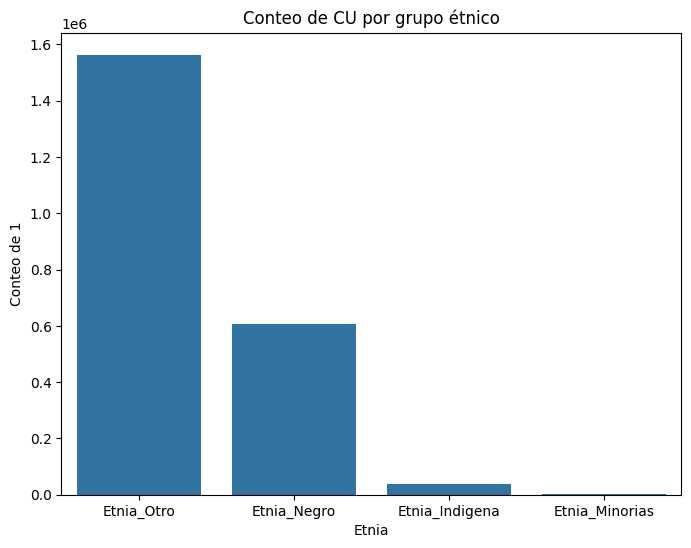

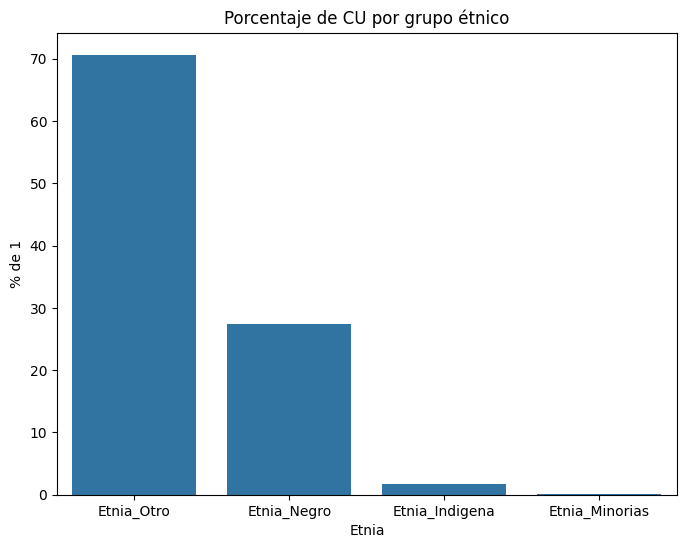

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols_etnia = ["Etnia_Otro","Etnia_Negro", "Etnia_Indigena", "Etnia_Minorias"]

data = []
for col in cols_etnia:
    conteo = df[col].sum()
    total = len(df[col])
    porcentaje = conteo / total * 100
    data.append({"Etnia": col, "Conteo": conteo, "Porcentaje": porcentaje})

df_plot = pd.DataFrame(data)

plt.figure(figsize=(8,6))
sns.barplot(x="Etnia", y="Conteo", data=df_plot)
plt.title("Conteo de CU por grupo étnico")
plt.ylabel("Conteo de 1")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="Etnia", y="Porcentaje", data=df_plot)
plt.title("Porcentaje de CU por grupo étnico")
plt.ylabel("% de 1")
plt.show()


La composición étnica de la muestra está dominada por una categoría mayoritaria, lo que resulta en un claro desbalance de clases. A pesar de esto, las categorías minoritarias tienen una presencia lo suficientemente grande como para justificar su inclusión en el análisis, por lo que todas las clases serán retenidas.

##### Sexo

/tmp/ipython-input-2777584975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
/tmp/ipython-input-2777584975.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')


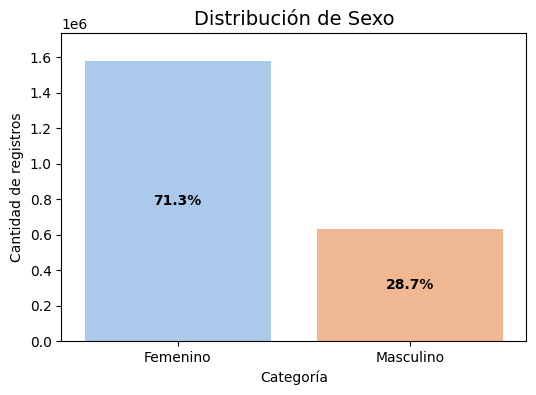

In [ ]:
plot_binary_bar(df, '8_Sexo_F', nombre_1='Femenino', nombre_0='Masculino', titulo='Distribución de Sexo')

La composición de la muestra por sexo es desigual, con una mayoría femenina que representa el 71.4% de los casos. Aun así, la representación del sexo masculino es sustancial, lo que permite realizar análisis comparativos fiables entre ambos géneros.

##### Uso de inhibidores de la enzima convertidora de angiotensina



/tmp/ipython-input-2777584975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
/tmp/ipython-input-2777584975.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')


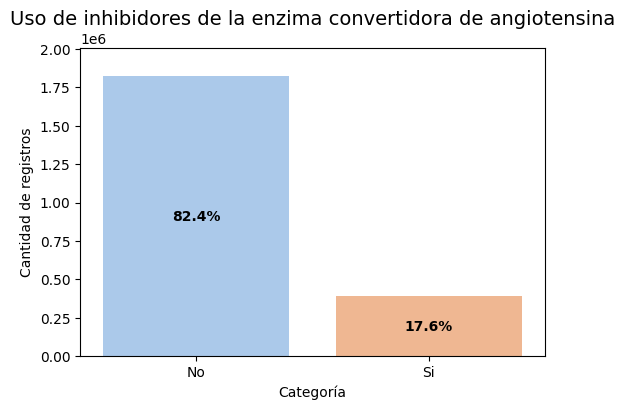

In [ ]:
plot_binary_bar(df, '36_RcbeIECA_SI', nombre_1='Si', nombre_0='No', titulo='Uso de inhibidores de la enzima convertidora de angiotensina')

Al igual que con el sexo, aquí también encontramos una distribución desigual con una clase dominante. No obstante, la clase minoritaria es lo bastante grande como para ser analizada de forma fiable, por lo que se procede sin necesidad de agrupar o eliminar categorías.

##### Uso de antagonistas de los receptores de angiotensina II.

/tmp/ipython-input-2777584975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
/tmp/ipython-input-2777584975.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')


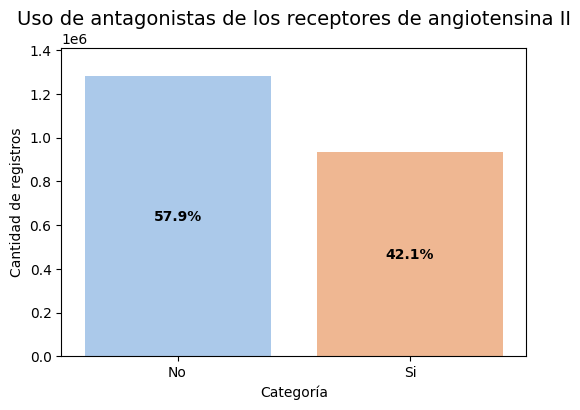

In [ ]:
plot_binary_bar(df, '37_RcbeARA2_SI', nombre_1='Si', nombre_0='No', titulo='Uso de antagonistas de los receptores de angiotensina II')

El uso de antagonistas de los receptores de angiotensina II (ARA II) es una característica bien balanceada en la muestra. El 42.1% de los individuos reporta su uso, frente al 57.9% que no, lo que representa una distribución casi equitativa.

##### Etiología de enfermedad renal crónica por hipertensión y diabetes.

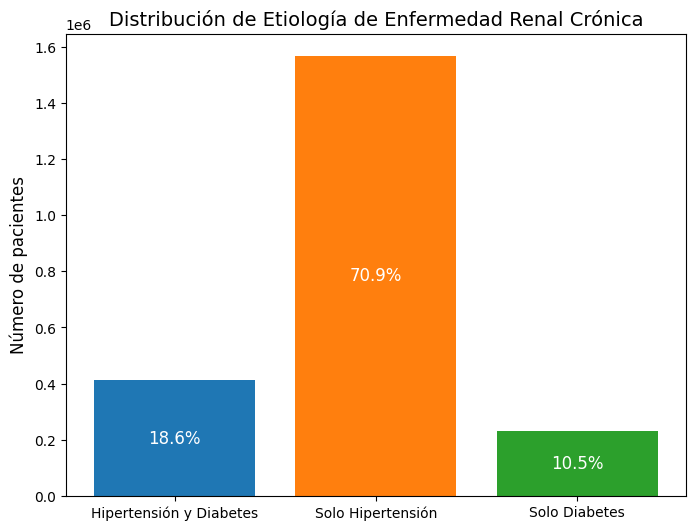

In [ ]:
import matplotlib.pyplot as plt

cols = [
    "22_EtiologiaERC_HTA-DM",
    "22_EtiologiaERC_HTA",
    "22_EtiologiaERC_DM"
]

labels = [
    "Hipertensión y Diabetes",
    "Solo Hipertensión",
    "Solo Diabetes"
]

conteos = df[cols].sum()
porcentajes = conteos / len(df) * 100

plt.figure(figsize=(8,6))
bars = plt.bar(labels, conteos.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

for bar, pct in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%', ha='center', va='center', color='white', fontsize=12)

plt.title('Distribución de Etiología de Enfermedad Renal Crónica', fontsize=14)
plt.ylabel('Número de pacientes', fontsize=12)
plt.show()


El análisis de la etiología de la Enfermedad Renal Crónica (ERC) revela un claro predominio de la hipertensión arterial como causa principal. La gran mayoría de los pacientes, un 70.9%, desarrollan ERC debido únicamente a la hipertensión. La combinación de hipertensión y diabetes es la segunda causa más frecuente, afectando al 18.6% de los individuos, mientras que la diabetes por sí sola representa el 10.5% de los casos. Estos datos subrayan que la hipertensión, ya sea sola o en conjunto con la diabetes, está implicada en casi el 90% de los casos de ERC en esta población.

##### Diagnóstico de hipertensión arterial.

/tmp/ipython-input-2777584975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
/tmp/ipython-input-2777584975.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')


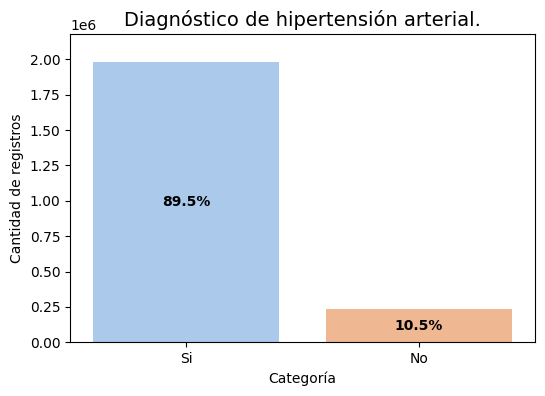

In [ ]:
plot_binary_bar(df, '18_DxHTA_SI', nombre_1='Si', nombre_0='No', titulo='Diagnóstico de hipertensión arterial.')

Se observa una alta prevalencia de hipertensión diagnosticada (89.5%), lo que resulta en un marcado desbalance de clases. Pese a ello, esta variable se considera indispensable y se conservará en el análisis, ya que la hipertensión es un factor de riesgo cardiovascular primario cuya exclusión comprometería la validez del estudio.

##### Diagnóstico de diabetes mellitus.


/tmp/ipython-input-2777584975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
/tmp/ipython-input-2777584975.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v/2, f"{porcentajes[i]}%", ha='center', va='center', fontweight='bold', color='black')


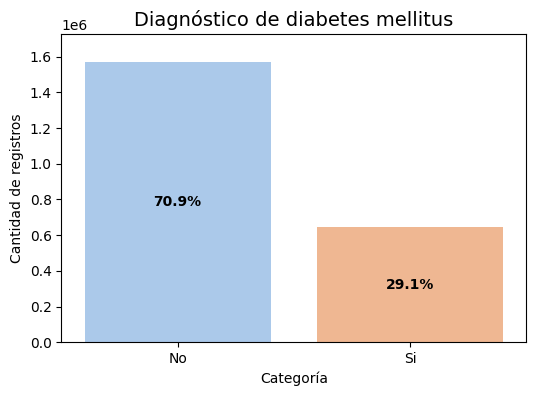

In [ ]:
plot_binary_bar(df, '20_DxDM_SI', nombre_1='Si', nombre_0='No', titulo='Diagnóstico de diabetes mellitus')

Los datos muestran que la prevalencia de diabetes mellitus diagnosticada en la muestra es del 29.1%. La mayoría de los individuos (70.9%) no padece esta condición. Esta distribución, si bien desigual, confirma a la diabetes como una de las comorbilidades más importantes y frecuentes en la población estudiada.

#### Conclusiones y Próximos Pasos
El análisis exploratorio revela el perfil de una población de alto riesgo, caracterizada por una prevalencia abrumadora de hipertensión diagnosticada (89.5%) y una considerable carga de diabetes mellitus (29.1%). Estas condiciones se manifiestan en una alta incidencia de Enfermedad Renal Crónica, causada mayoritariamente por la propia hipertensión. Este perfil de riesgo se ve reforzado por las características antropométricas, con una clara tendencia hacia el sobrepeso y la obesidad indicada por el sesgo a la derecha en las distribuciones de peso e IMC. Demográficamente, la muestra se concentra en adultos mayores, principalmente entre 55 y 70 años, con una notable mayoría de mujeres.
A nivel de datos, se identificaron artefactos como la preferencia de dígito en las mediciones de presión arterial y la distribución irregular de la edad. Para mitigar estos efectos y preparar el dataset para el modelado, los próximos pasos se centrarán en la ingeniería de características. Concretamente, se propone discretizar las variables continuas como la presión arterial y la edad en rangos clínicamente relevantes para balancear su influencia. Las demás variables binarias, al haber sido ya depuradas y validadas, se encuentran listas para ser utilizadas directamente en la construcción de un modelo predictivo de riesgo cardiovascular.

### Analisis multivariado

In [232]:
cols_riesgo = [
    'CLASIFICACION FINAL DEL RIESGO_ALTO',
    'CLASIFICACION FINAL DEL RIESGO_BAJO',
    'CLASIFICACION FINAL DEL RIESGO_MODERADO',
    'CLASIFICACION FINAL DEL RIESGO_MUY ALTO'
]

def riesgo_label(row):
    if row['CLASIFICACION FINAL DEL RIESGO_ALTO'] == 1:
        return 'ALTO'
    elif row['CLASIFICACION FINAL DEL RIESGO_BAJO'] == 1:
        return 'BAJO'
    elif row['CLASIFICACION FINAL DEL RIESGO_MODERADO'] == 1:
        return 'MODERADO'
    elif row['CLASIFICACION FINAL DEL RIESGO_MUY ALTO'] == 1:
        return 'MUY ALTO'
    else:
        return 'DESCONOCIDO'

df['Riesgo'] = df.apply(riesgo_label, axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Riesgo_encoded'] = le.fit_transform(df['Riesgo'])
df = df.drop(columns=['CLASIFICACION FINAL DEL RIESGO_ALTO'])
df = df.drop(columns=['CLASIFICACION FINAL DEL RIESGO_BAJO'])
df = df.drop(columns=['CLASIFICACION FINAL DEL RIESGO_MODERADO'])
df = df.drop(columns=['CLASIFICACION FINAL DEL RIESGO_MUY ALTO'])


Previo al análisis bivariado, se aplicó label encoding a la variable objetivo en lugar de one-hot encoding. Este método se eligió por ser más simple para esta etapa y porque mantiene el orden intrínseco de la variable.

#### Continuas

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

def analizar_continua(df, var, objetivo, metodo="anova", titulo=None, xlabel=None, ylabel=None):
    """
    Analiza una variable continua vs variable objetivo multicategoría.

    df: DataFrame
    var: variable continua (string)
    objetivo: variable objetivo multicategoría (string)
    metodo: "anova" o "kruskal" (si no cumple normalidad)
    titulo: título opcional para el gráfico
    xlabel: nombre opcional para eje X
    ylabel: nombre opcional para eje Y
    """
    # Crear lista de valores por grupo
    grupos = [df[df[objetivo]==cat][var].dropna() for cat in df[objetivo].unique()]

    # Prueba estadística
    if metodo=="anova":
        stat, p = f_oneway(*grupos)
        prueba = "ANOVA"
    else:
        stat, p = kruskal(*grupos)
        prueba = "Kruskal-Wallis"

    # -------------------
    # Boxplot
    # -------------------
    plt.figure(figsize=(8,5))
    sns.boxplot(x=objetivo, y=var, data=df)
    plt.title(titulo if titulo else f'{var} vs {objetivo} ({prueba})')
    plt.xlabel(xlabel if xlabel else objetivo)
    plt.ylabel(ylabel if ylabel else var)
    plt.show()

    # Interpretación
    if p < 0.05:
        print(f"✅ La variable {var} muestra diferencias significativas entre grupos de {objetivo} (p={p:.4f})")
    else:
        print(f"❌ La variable {var} NO muestra diferencias significativas entre grupos de {objetivo} (p={p:.4f})")


##### Presión Sistólica contra Riesgo

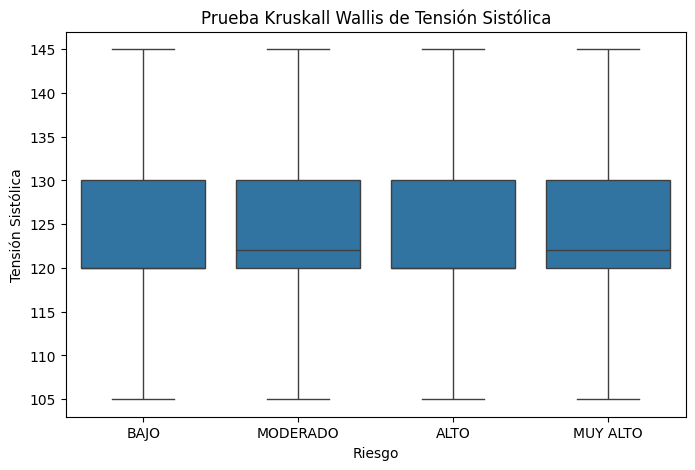

✅ La variable 25_TenArtSis muestra diferencias significativas entre grupos de Riesgo (p=0.0000)


In [238]:
analizar_continua(df=df, var="25_TenArtSis", objetivo="Riesgo", metodo="Kruskal-Wallis", titulo="Prueba Kruskall Wallis de Tensión Sistólica", ylabel="Tensión Sistólica")

El análisis de la tensión sistólica (25_TenArtSis) frente a los niveles de riesgo revela un hallazgo importante. Aunque la prueba de Kruskal-Wallis arroja un resultado estadísticamente significativo (p=0), lo que formalmente indica que existen diferencias en la tensión arterial entre los grupos, una inspección visual del gráfico de cajas muestra lo contrario. Las distribuciones de la tensión sistólica para las categorías de riesgo BAJO, MODERADO, ALTO y MUY ALTO son notablemente similares, con medianas y rangos intercuartílicos casi idénticos. Esta aparente contradicción sugiere que, si bien existe una relación estadística, su magnitud o "tamaño del efecto" es muy pequeño, probablemente debido a un gran volumen de datos que magnifica diferencias triviales. En conclusión, aunque la tensión sistólica es un predictor estadísticamente válido, su capacidad para diferenciar los niveles de riesgo en la práctica es muy limitada, ya que los valores son muy homogéneos en todos los grupos.

##### Presión diastólica contra Riesgo

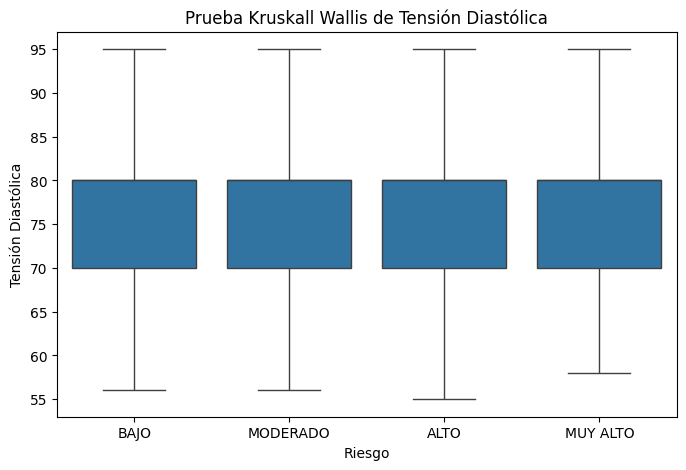

✅ La variable 26_TenArtDitlica muestra diferencias significativas entre grupos de riesgo (p=0.0000)


In [ ]:
analizar_continua(df=df, var="26_TenArtDitlica", objetivo="Riesgo", metodo="Kruskal-Wallis", titulo="Prueba Kruskall Wallis de Tensión Diastólica", ylabel="Tensión Diastólica")

El análisis presentado utiliza la prueba de Kruskal-Wallis para evaluar si existen diferencias en la Tensión Diastólica entre los distintos grupos de Riesgo (BAJO, MODERADO, ALTO y MUY ALTO). A pesar de que el gráfico de cajas y bigotes muestra que las distribuciones de la tensión diastólica son visualmente casi idénticas en todos los grupos, el resultado estadístico es contundente, con un p-valor de 0.0000. Este valor tan bajo indica que existen diferencias estadísticamente significativas entre los grupos. Esta aparente contradicción resalta que, aunque las diferencias puedan ser muy pequeñas y no evidentes a simple vista, son lo suficientemente consistentes para que la prueba estadística las detecte como significativas, una situación común cuando se trabaja con conjuntos de datos grandes.

##### Índice de Masa Corporal (IMC) contra el riesgo

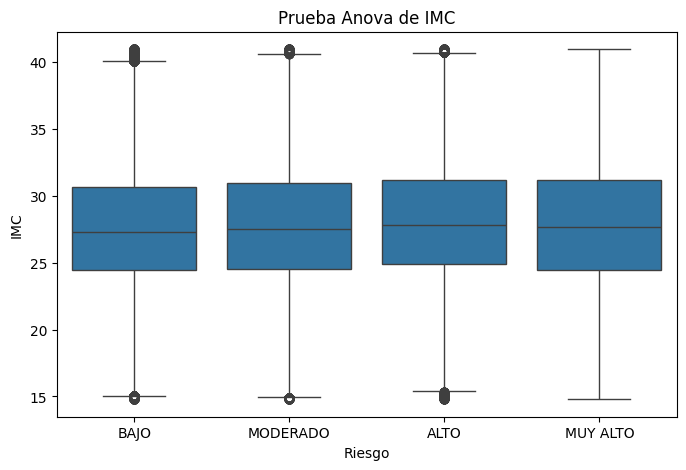

✅ La variable Indice Masa Corporal = Peso/talla Al Cuadrado muestra diferencias significativas entre grupos de Riesgo (p=0.0000)


In [241]:
analizar_continua(df=df, var="Indice Masa Corporal = Peso/talla Al Cuadrado", objetivo="Riesgo", metodo="Anova", titulo="Prueba Anova de IMC", ylabel="IMC")

En este análisis se examina la relación entre el Índice de Masa Corporal (IMC) y cuatro categorías de riesgo (BAJO, MODERADO, ALTO, MUY ALTO) mediante una prueba de Anova. A simple vista, los gráficos de caja para cada grupo son prácticamente indistinguibles, lo que sugiere que la distribución del IMC es muy similar en todos los niveles de riesgo. Sin embargo, el resultado de la prueba estadística indica lo contrario, con un p-valor de 0.0000. Este valor, al ser extremadamente bajo, confirma que existen diferencias estadísticamente significativas en el IMC entre los grupos. Esta situación demuestra que, aunque las diferencias en las medianas o distribuciones sean mínimas y no se puedan apreciar visualmente, son lo suficientemente consistentes en el conjunto de datos como para que una prueba estadística las identifique como significativas.

##### Altura contra el riesgo

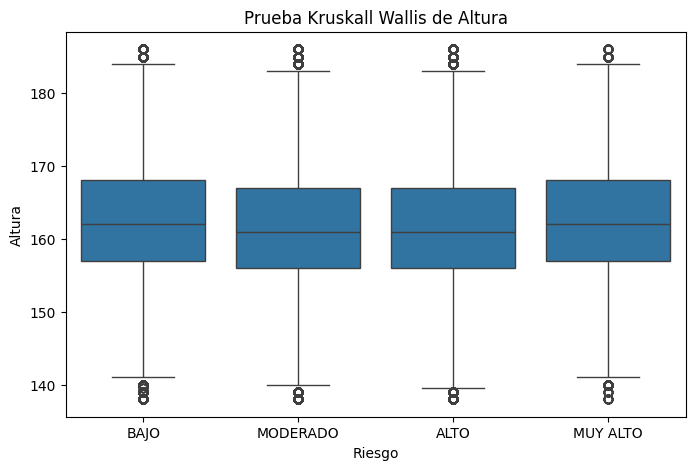

✅ La variable 24_Talla muestra diferencias significativas entre grupos de Riesgo (p=0.0000)


In [242]:
analizar_continua(df=df, var="24_Talla", objetivo="Riesgo", metodo="Kruskal-Wallis", titulo="Prueba Kruskall Wallis de Altura", ylabel="Altura")

Este gráfico presenta los resultados de una prueba de Kruskal-Wallis que compara la variable Altura entre los diferentes grupos de Riesgo (BAJO, MODERADO, ALTO, MUY ALTO). A nivel visual, los diagramas de caja para cada grupo son muy parecidos, mostrando medianas y rangos intercuartílicos casi idénticos, lo que podría sugerir que no hay diferencias en la altura entre las categorías de riesgo. Sin embargo, el análisis estadístico revela un p-valor de 0.0000, un resultado extremadamente bajo. Este valor indica de manera concluyente que, a pesar de la similitud visual, existen diferencias estadísticamente significativas en la altura entre al menos dos de los grupos de riesgo, demostrando la capacidad de la prueba para detectar variaciones sutiles pero consistentes que no son obvias a simple vista.

##### Peso contra el Riesgo

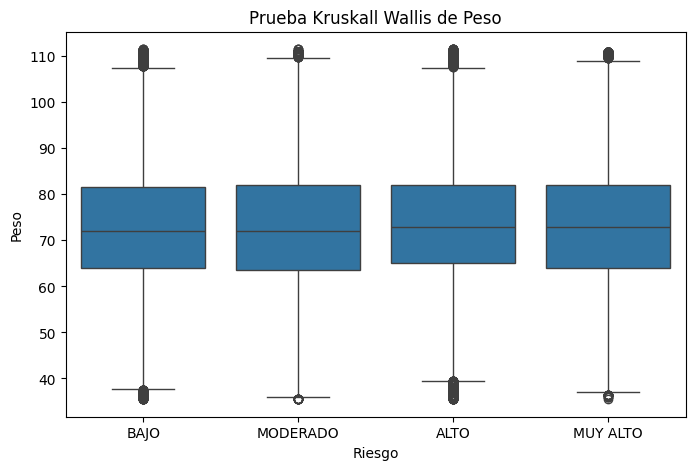

✅ La variable 23_Peso muestra diferencias significativas entre grupos de Riesgo (p=0.0000)


In [243]:
analizar_continua(df=df, var="23_Peso", objetivo="Riesgo", metodo="Kruskal-Wallis", titulo="Prueba Kruskall Wallis de Peso", ylabel="Peso")

Este análisis utiliza la prueba de Kruskal-Wallis para comparar la variable Peso entre las categorías de Riesgo (BAJO, MODERADO, ALTO y MUY ALTO). Al observar los diagramas de caja, la distribución del peso parece ser idéntica en todos los grupos, con medianas y rangos intercuartílicos que se solapan completamente, lo que visualmente sugiere una falta de diferencia. No obstante, el resultado estadístico de la prueba, con un p-valor de 0.0000, contradice esta impresión inicial. Este valor tan bajo indica de manera inequívoca que existen diferencias estadísticamente significativas en el peso entre los grupos de riesgo. Por lo tanto, se concluye que, aunque las diferencias son demasiado sutiles para ser apreciadas a simple vista en el gráfico, son lo suficientemente consistentes en los datos como para ser estadísticamente relevantes.

##### EDAD contra Riesgo

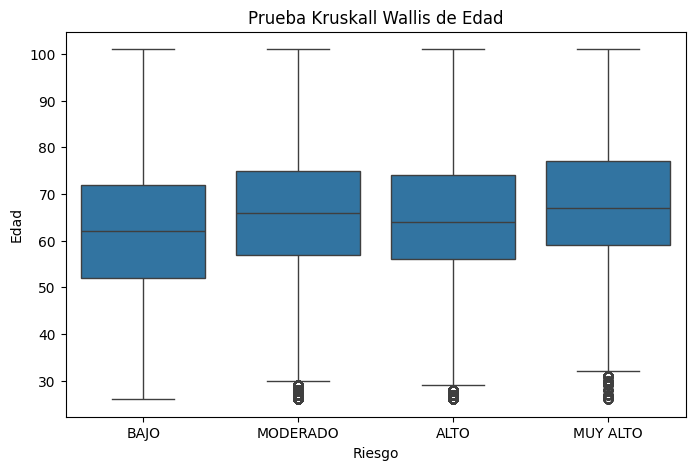

✅ La variable EDAD (Años cumplidos) muestra diferencias significativas entre grupos de Riesgo (p=0.0000)


In [244]:
analizar_continua(df=df, var="EDAD (Años cumplidos)", objetivo="Riesgo", metodo="Kruskal-Wallis", titulo="Prueba Kruskall Wallis de Edad", ylabel="Edad")

En este gráfico se presenta un análisis de la variable Edad (en años cumplidos) a través de los distintos grupos de Riesgo (BAJO, MODERADO, ALTO y MUY ALTO), utilizando una prueba de Kruskal-Wallis. A diferencia de los análisis anteriores, en este caso se observa una clara tendencia visual: a medida que aumenta el nivel de riesgo, la distribución de la edad tiende a ser más alta. Se puede apreciar que la mediana de la edad (la línea central de la caja) se incrementa progresivamente desde el grupo de BAJO riesgo hasta el de MUY ALTO riesgo. Esta observación visual es confirmada de manera contundente por el resultado estadístico, que arroja un p-valor de 0.0000. Por lo tanto, se concluye con alta certeza que existen diferencias significativas en la edad entre los grupos, indicando que la edad es un factor fuertemente asociado al nivel de riesgo.

#### Discretas

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype # <- Asegúrate de importar esto

def analizar_categorica_ordenada(df, var, objetivo, label=None, labels_valores=None, orden_objetivo=None):
    """
    Analiza una variable categórica (0/1 o grupos) vs variable objetivo multicategoría,
    permitiendo especificar el orden de las categorías del objetivo.

    df: DataFrame
    var: variable categórica (string)
    objetivo: variable objetivo multicategoría (string)
    label: nombre amigable de la variable (opcional)
    labels_valores: lista de labels para los valores [0, 1] (opcional)
    orden_objetivo: lista con el orden deseado para las categorías de la variable objetivo (opcional)
    """
    df_temp = df.copy()

    # Reemplazar valores si se proporcionan labels para los valores
    if labels_valores:
        mapping_valores = {0: labels_valores[0], 1: labels_valores[1]}
        df_temp[var] = df_temp[var].map(mapping_valores)

    # --- INICIO DE LA MODIFICACIÓN ---
    # Si se proporciona un orden para la variable objetivo, lo aplicamos.
    if orden_objetivo:
        # Creamos un tipo de dato categórico con el orden especificado.
        cat_type = CategoricalDtype(categories=orden_objetivo, ordered=True)
        df_temp[objetivo] = df_temp[objetivo].astype(cat_type)
    # --- FIN DE LA MODIFICACIÓN ---

    # Crosstab respetará el orden de la categoría si está definido.
    tabla = pd.crosstab(df_temp[var], df_temp[objetivo])
    chi2, p, dof, ex = chi2_contingency(tabla)

    # Gráfico
    tabla_norm = tabla.div(tabla.sum(axis=0), axis=1)
    tabla_norm.T.plot(kind='bar', stacked=True, figsize=(8,5))

    nombre_var = label if label else var
    plt.title(f'{nombre_var} vs {objetivo} (Chi-cuadrado, p={p:.4f})')
    plt.ylabel("Proporción")
    plt.xlabel(objetivo)
    plt.xticks(rotation=0) # Mantiene las etiquetas horizontales para mejor lectura.
    plt.show()

    # Interpretación
    if p < 0.05:
        print(f"✅ La variable {nombre_var} está asociada significativamente con {objetivo} (p={p:.4f})")
    else:
        print(f"❌ La variable {nombre_var} NO está asociada significativamente con {objetivo} (p={p:.4f})")

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype

def analizar_onehot(df, columnas_onehot, objetivo, titulo_grafico=None, labels_categorias=None,  orden_objetivo=None,):
    """
    Analiza varias columnas one-hot vs una variable objetivo categórica.

    df: DataFrame
    columnas_onehot: lista de columnas one-hot
    objetivo: variable objetivo multicategoría
    titulo_grafico: opcional, título del gráfico
    orden_objetivo: lista con el orden para las categorías del objetivo (opcional)
    labels_categorias: diccionario para renombrar las categorías one-hot (opcional)
    """
    df_temp = df.copy()

    # Aplicar orden a la variable objetivo si se proporciona
    if orden_objetivo:
        cat_type = CategoricalDtype(categories=orden_objetivo, ordered=True)
        df_temp[objetivo] = df_temp[objetivo].astype(cat_type)

    # Crear columna combinada a partir de las columnas one-hot
    df_temp['Categoria'] = df_temp[columnas_onehot].idxmax(axis=1)

    # --- INICIO DE LA MODIFICACIÓN DE LABELS ---
    # Renombrar las categorías si se proporciona un diccionario de labels
    if labels_categorias:
        df_temp['Categoria'] = df_temp['Categoria'].map(labels_categorias)
    # --- FIN DE LA MODIFICACIÓN DE LABELS ---

    # Tabla de contingencia
    tabla = pd.crosstab(df_temp['Categoria'], df_temp[objetivo])

    # Chi-cuadrado
    chi2, p, dof, ex = chi2_contingency(tabla)

    # Gráfico de proporciones
    tabla_norm = tabla.div(tabla.sum(axis=0), axis=1)
    tabla_norm.T.plot(kind='bar', stacked=True, figsize=(10,6))

    titulo = titulo_grafico if titulo_grafico else f"Categorías vs {objetivo}"
    plt.title(titulo + f" (Chi-cuadrado, p={p:.4f})")

    plt.ylabel("Proporción")
    plt.xlabel(objetivo)
    plt.xticks(rotation=0)
    plt.legend(title='Categoría')
    plt.show()

    # Interpretación
    if p < 0.05:
        print(f"✅ Las categorías están asociadas significativamente con {objetivo} (p={p:.4f})")
    else:
        print(f"❌ No hay asociación significativa con {objetivo} (p={p:.4f})")

In [261]:
orden = ["BAJO", "MODERADO", "ALTO", "MUY ALTO"]

##### Carácterización Etnica contra Riesto

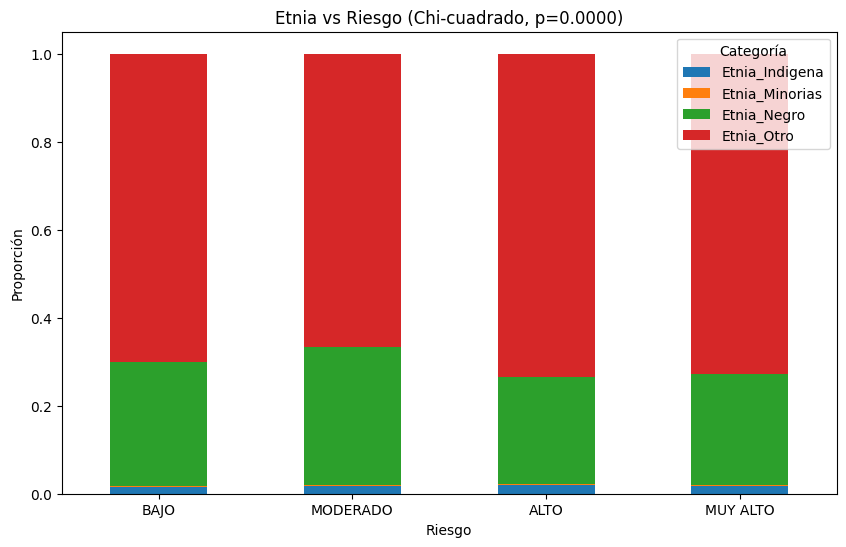

✅ Las categorías están asociadas significativamente con Riesgo (p=0.0000)


In [287]:
analizar_onehot(df, ["Etnia_Otro","Etnia_Negro", "Etnia_Indigena", "Etnia_Minorias"], 'Riesgo', titulo_grafico="Etnia vs Riesgo", orden_objetivo=orden)

Este gráfico de barras apiladas muestra la distribución proporcional de diferentes grupos étnicos (Indígena, Minorías, Negro, Otro) dentro de cada categoría de Riesgo (ALTO, BAJO, MODERADO, MUY ALTO). El análisis se complementa con una prueba de Chi-cuadrado para determinar si existe una asociación estadística entre estas dos variables.

Visualmente, se puede observar que en todas las categorías de riesgo, las etnias "Negro" y "Otro" constituyen la gran mayoría de la población, mientras que "Indígena" y "Minorías" representan una proporción muy pequeña. Aunque a simple vista las proporciones entre los grupos "Negro" y "Otro" parecen variar ligeramente de una categoría de riesgo a otra, la prueba estadística es la que ofrece la conclusión definitiva. El resultado de la prueba de Chi-cuadrado muestra un p-valor de 0.0000, lo que indica una asociación estadísticamente muy significativa. Por lo tanto, se concluye que la distribución de las etnias no es la misma en todos los niveles de riesgo; es decir, existe una relación estadísticamente significativa entre la etnia de una persona y su categoría de riesgo.

##### Etiología de Enfermedad Renal Crónica contra Riesgo

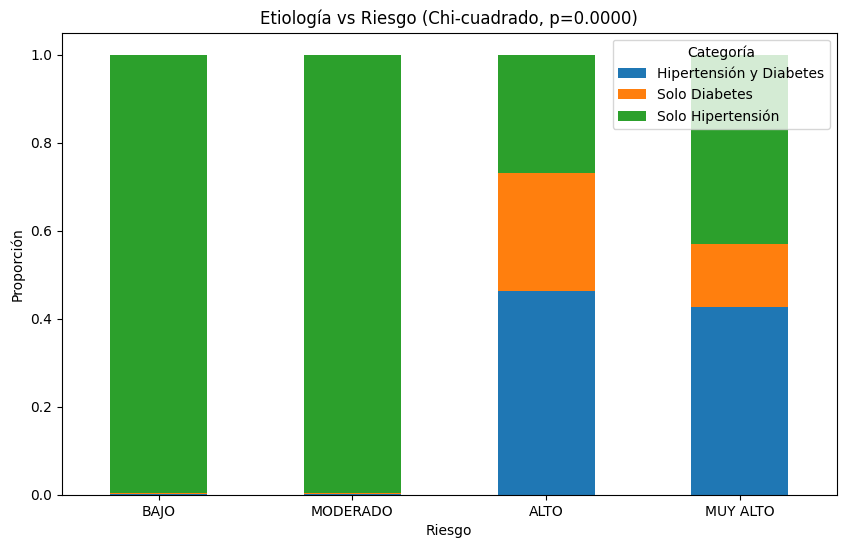

✅ Las categorías están asociadas significativamente con Riesgo (p=0.0000)


In [286]:
cols = ["22_EtiologiaERC_HTA-DM","22_EtiologiaERC_HTA","22_EtiologiaERC_DM"]

labels = {
    "22_EtiologiaERC_HTA-DM": "Hipertensión y Diabetes",
    "22_EtiologiaERC_HTA": "Solo Hipertensión",
    "22_EtiologiaERC_DM": "Solo Diabetes"
}

# La llamada a la función ahora funcionará correctamente
analizar_onehot(df, cols, "Riesgo", "Etiología vs Riesgo", labels, orden)

La visualización muestra una diferencia muy marcada y clara entre los grupos de riesgo. En las categorías de riesgo BAJO y MODERADO, el 100% de los casos corresponden a la etiología "Solo Hipertensión". En cambio, en los grupos de riesgo ALTO y MUY ALTO, la composición es completamente diferente: aparece una proporción significativa de casos con "Solo Diabetes" e "Hipertensión y Diabetes", mientras que la proporción de "Solo Hipertensión" disminuye drásticamente.

Esta fuerte distinción visual es confirmada de manera contundente por la prueba de Chi-cuadrado, que arroja un p-valor de 0.0000. Este resultado indica que existe una asociación estadística extremadamente significativa entre la etiología y el nivel de riesgo. En conclusión, la presencia de diabetes, ya sea sola o en combinación con hipertensión, está fuertemente ligada a los niveles de riesgo más elevados.

Sexo contra Riesgo

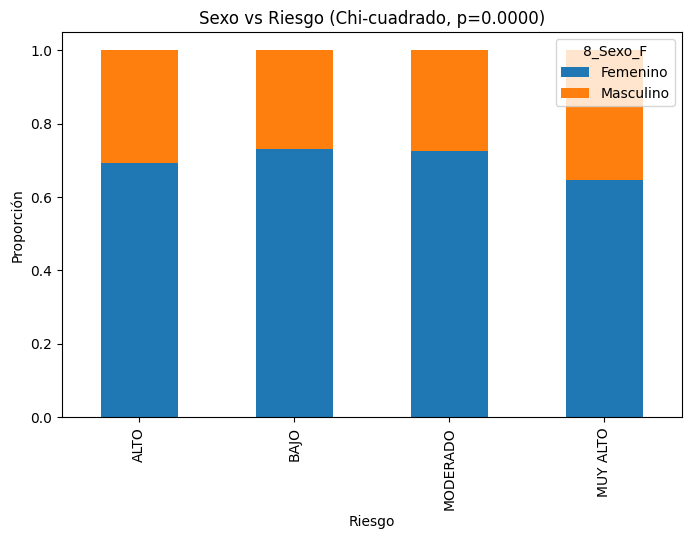

✅ La variable Sexo está asociada significativamente con Riesgo (p=0.0000)


In [255]:
analizar_categorica(df, "8_Sexo_F", "Riesgo", "Sexo", ["Masculino","Femenino"])

Este análisis muestra la relación entre el Sexo y el nivel de Riesgo. Aunque las proporciones de hombres y mujeres parecen relativamente similares en todas las categorías, la prueba de Chi-cuadrado (con p=0.0000) confirma que existe una asociación estadísticamente significativa. Esto indica que la distribución de género varía de forma relevante entre los distintos niveles de riesgo.

##### Uso de inhibidores de la enzima convertidora de angiotensina contra Riesgo

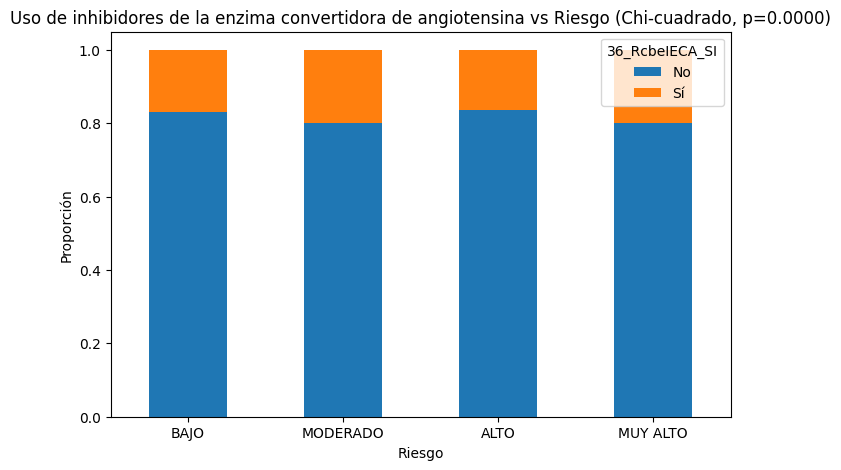

✅ La variable Uso de inhibidores de la enzima convertidora de angiotensina está asociada significativamente con Riesgo (p=0.0000)


In [267]:
analizar_categorica_ordenada(df, "36_RcbeIECA_SI", "Riesgo", "Uso de inhibidores de la enzima convertidora de angiotensina", ["No", "Sí"], orden_objetivo=orden)

Este análisis muestra la relación entre el uso de inhibidores de la enzima convertidora de angiotensina (IECA) y el nivel de Riesgo. El gráfico evidencia que, aunque la mayoría de las personas en todos los grupos no usan estos inhibidores, la proporción de quienes SÍ los utilizan (en naranja) es notablemente mayor en las categorías de riesgo MODERADO y MUY ALTO. La prueba de Chi-cuadrado (p=0.0000) confirma que esta asociación es estadísticamente muy significativa, indicando que el uso de este medicamento está fuertemente ligado a los niveles de riesgo más elevados.

##### Uso de antagonistas de los receptores de angiotensina II contra riesgo

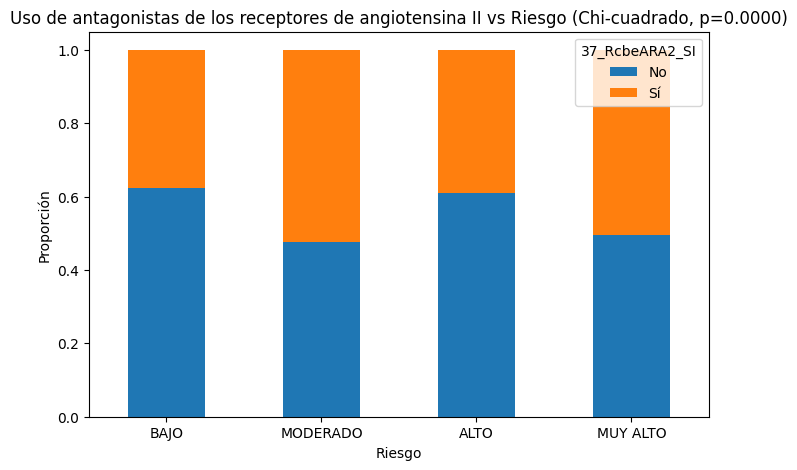

✅ La variable Uso de antagonistas de los receptores de angiotensina II está asociada significativamente con Riesgo (p=0.0000)


In [268]:
analizar_categorica_ordenada(df, "37_RcbeARA2_SI", "Riesgo", "Uso de antagonistas de los receptores de angiotensina II", ["No", "Sí"],orden_objetivo=orden)

Este gráfico analiza la relación entre el uso de antagonistas de los receptores de angiotensina II (ARA II) y los niveles de Riesgo. Se observa una clara diferencia en las proporciones: el uso de este medicamento (en naranja) es mucho más frecuente en los grupos de riesgo MODERADO y MUY ALTO en comparación con el grupo de BAJO riesgo. Esta fuerte asociación visual es confirmada por la prueba de Chi-cuadrado (p=0.0000), lo que indica que el uso de ARA II está significativamente ligado al nivel de riesgo del paciente.

##### Diagnóstico de hipertensión arterial contra Riesgo

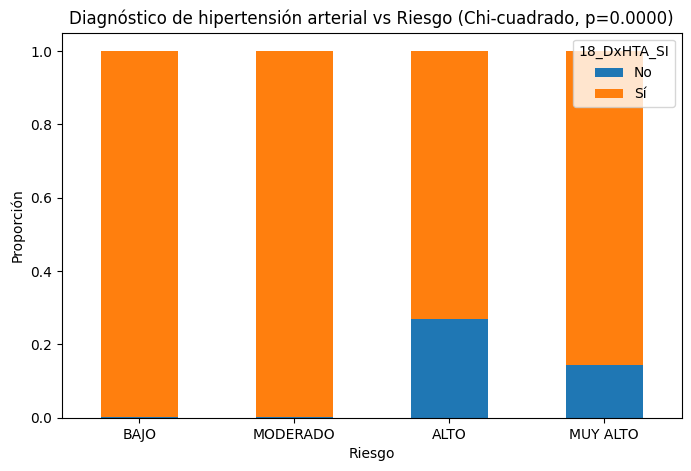

✅ La variable Diagnóstico de hipertensión arterial está asociada significativamente con Riesgo (p=0.0000)


In [269]:
analizar_categorica_ordenada(df, "18_DxHTA_SI", "Riesgo", "Diagnóstico de hipertensión arterial", ["No", "Sí"],orden_objetivo=orden)

Este análisis muestra una relación muy marcada entre el Diagnóstico de hipertensión arterial y el nivel de Riesgo.

La diferencia es visualmente contundente: en los grupos de riesgo BAJO y MODERADO, el 100% de las personas tienen un diagnóstico de hipertensión arterial ("Sí"). En cambio, en las categorías de riesgo ALTO y MUY ALTO, aparece una proporción de individuos que NO tienen este diagnóstico.

La prueba de Chi-cuadrado, con un p-valor de 0.0000, confirma que esta asociación es extremadamente significativa. En resumen, tener un diagnóstico de hipertensión es un factor clave que varía drásticamente entre los diferentes niveles de riesgo.

##### Diagnóstico de diabetes mellitus contra Riesgo

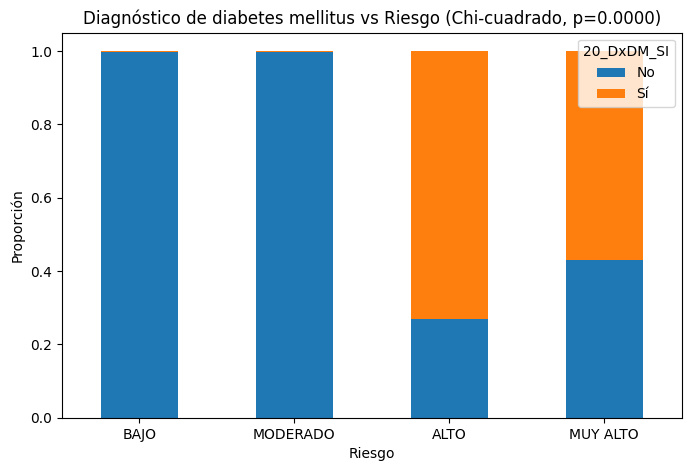

✅ La variable Diagnóstico de diabetes mellitus está asociada significativamente con Riesgo (p=0.0000)


In [270]:
analizar_categorica_ordenada(df, "20_DxDM_SI", "Riesgo", "Diagnóstico de diabetes mellitus", ["No", "Sí"],orden_objetivo=orden)

Este análisis revela una asociación extremadamente fuerte entre el Diagnóstico de diabetes mellitus y el nivel de Riesgo.

La diferencia visual es drástica: en los grupos de riesgo BAJO y MODERADO, la práctica totalidad de los individuos NO tienen un diagnóstico de diabetes. Por el contrario, en las categorías de riesgo ALTO y MUY ALTO, una proporción muy grande de personas SÍ están diagnosticadas con diabetes.

Esta clara relación es confirmada estadísticamente por la prueba de Chi-cuadrado con un p-valor de 0.0000, lo que indica una asociación muy significativa. En conclusión, el diagnóstico de diabetes mellitus es un factor determinante y fuertemente ligado a los niveles de riesgo más elevados.

#### Conclusiones y próximos pasos
Los análisis bivariados revelaron que todas las variables estudiadas están asociadas de manera estadísticamente significativa con el nivel de Riesgo (p=0.0000 en todos los casos).

De estos hallazgos, se concluye que el perfil de riesgo es multifactorial, aunque con factores de impacto variable. Las asociaciones más contundentes y visualmente claras se observaron con la Etiología y los diagnósticos de comorbilidades, donde la presencia de Diabetes Mellitus es un diferenciador crítico casi exclusivo de los niveles de riesgo ALTO y MUY ALTO. La Edad también muestra una fuerte tendencia positiva, indicando que a mayor edad, mayor riesgo. Variables como el uso de medicamentos específicos (IECA y ARA II), el sexo y la etnia también mostraron asociaciones claras. Curiosamente, aunque las medidas antropométricas (Peso, Altura, IMC) y fisiológicas (Tensión Sistólica y Diastólica) son estadísticamente significativas, sus diferencias visuales entre grupos son mínimas, sugiriendo que su contribución al riesgo podría ser más sutil o dependiente de la interacción con otros factores. Como siguientes pasos, es fundamental superar las limitaciones del análisis bivariado y proceder con un análisis multivariado.

Se recomienda construir un modelo de regresión logística o un algoritmo de clasificación (como árboles de decisión o random forest) para cuantificar el peso e importancia relativa de cada variable en conjunto, identificar posibles interacciones entre ellas y, finalmente, desarrollar un modelo predictivo robusto que permita clasificar a nuevos pacientes según su perfil de riesgo de manera precisa y automatizada.

### Preparación de los datos

#### Continuas

##### Presión sistólica y diastólica

In [288]:
import pandas as pd
import numpy as np

df_train = df.copy()

bins_sistolica = [-np.inf, 119, 139, np.inf]
labels_sistolica = ['Baja', 'Media', 'Alta']

df_train['Sistolica_Discretizada'] = pd.cut(
    df_train['25_TenArtSis'],
    bins=bins_sistolica,
    labels=labels_sistolica,
    right=False
)

bins_diastolica = [-np.inf, 79, 89, np.inf]
labels_diastolica = ['Baja', 'Media', 'Alta']

df_train['Diastolica_Discretizada'] = pd.cut(
    df_train['26_TenArtDitlica'],
    bins=bins_diastolica,
    labels=labels_diastolica,
    right=False
)

df_train = df_train.drop(columns=['25_TenArtSis', '26_TenArtDitlica'])

Con base en las conclusiones obtenidas durante el análisis univariado, se identificó un notable sesgo de preferencia de dígito en las mediciones de presión arterial. Para mitigar el impacto de este sesgo en el rendimiento del modelo y capturar rangos clínicamente relevantes en lugar de valores exactos, se ha decidido transformar las variables continuas de presión arterial. Específicamente, las variables 25_TenArtSis (presión sistólica) y 26_TenArtDitlica (presión diastólica) serán discretizadas en tres categorías ordinales: 'Baja', 'Media' y 'Alta'. Este proceso de ingeniería de características reemplazará las variables originales por sus contrapartes categóricas en el conjunto de datos de entrenamiento, con el objetivo de mejorar la robustez y la capacidad de generalización del modelo.


##### Demás variables

In [290]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

columnas_a_estandarizar = [
    '24_Talla',
    '23_Peso',
    'Indice Masa Corporal = Peso/talla Al Cuadrado',
    'EDAD (Años cumplidos)'
]

scaler = StandardScaler()

df_train_final = df_train.copy()


df_train_final[columnas_a_estandarizar] = scaler.fit_transform(df_train[columnas_a_estandarizar])

En contraste con las variables de presión arterial, el análisis exploratorio de las demás variables continuas —Edad, IMC, Altura y Peso— no reveló sesgos o anomalías significativas que justificaran un proceso de discretización. Sin embargo, estas variables operan en escalas y magnitudes muy diferentes entre sí (e.g., la edad en decenas y el peso en kilogramos). Para prevenir que los algoritmos de aprendizaje automático asignen una importancia indebida a las variables con rangos numéricos más altos y para mejorar la convergencia y el rendimiento general del modelo, se procederá a estandarizar estas características. Este proceso transformará los datos para que tengan una media de cero y una desviación estándar de uno, asegurando que todas las variables contribuyan de manera equitativa al entrenamiento del modelo.


#### Discretas

Durante la fase de preparación de datos, se evaluó el tratamiento requerido para las variables categóricas del estudio. Se determinó que las variables Etnia, Etiología, Diagnóstico de hipertensión arterial, Diagnóstico de diabetes mellitus y Sexo no necesitaron ninguna transformación adicional.
Esto se debe a que dichas variables ya se encontraban codificadas en formato one-hot encoding en el conjunto de datos original. Las columnas redundantes o innecesarias que pudieran derivarse de esta codificación fueron gestionadas y eliminadas de manera anticipada durante la etapa previa de limpieza de datos. Por consiguiente, estas variables se consideraron listas para ser utilizadas directamente en la fase de análisis y modelado.

#### Conclusiones

En la fase de preparación de datos, se transformó el conjunto de datos para optimizarlo para el modelado. Las variables categóricas, ya en formato one-hot, no requirieron cambios. Para mitigar el sesgo de preferencia de dígito, las presiones sistólica y diastólica fueron discretizadas en categorías de 'Baja', 'Media' y 'Alta', reemplazando a las originales. Finalmente, las variables numéricas restantes (Edad, IMC, Peso, Talla) se estandarizaron para normalizar sus distintas escalas. El conjunto de datos resultante se encuentra ahora limpio, procesado y listo para la construcción del modelo predictivo.